In [1]:
# from __future__ import print_function, division

In [3]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Part 1

In [19]:
# TODO define gaussian function here
def gaussian(x, mean, variance):
    return (1/np.sqrt(2*np.pi*variance))*np.exp((-(x-mean)**2)/(2*variance))

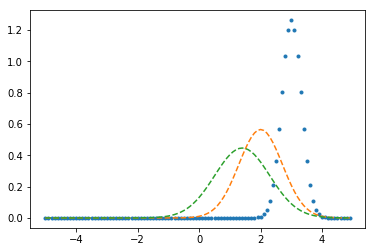

In [173]:
# TODO plot gaussians here
x=np.arange(-5,5,.1)
y=gaussian(x,3,.1)
plt.plot(x,y,'.')
plt.plot(x,gaussian(x,2,.5),'--')
plt.plot(x,gaussian(x,1.4,.8),'--')


C:\Users\newpo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


Text(0,0.5,u'Probability of Finding an Elephant')

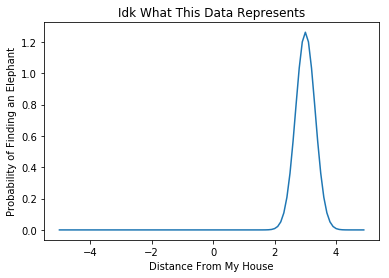

In [176]:
# TODO fit gaussians, with known parameters, here
params, cov = optimize.curve_fit(gaussian,x,y)
# TODO plot result
plt.plot(x,gaussian(x,*params),'-')
plt.title('Idk What This Data Represents')
plt.xlabel('Distance From My House')
plt.ylabel('Probability of Finding an Elephant')

In [177]:
# TODO: load data here
data=np.loadtxt('HDalpha_data')
data=np.array(data)
x_data=data[:,0]
y_data=data[:,1]

Text(0.5,1,u'Hydrogen Alpha Absorption Data')

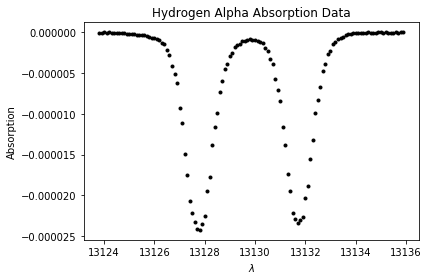

In [178]:
# TODO: plot it
plt.plot(x_data,y_data,'k.')
plt.xlabel('$\lambda$')
plt.ylabel('Absorption')
plt.title('Hydrogen Alpha Absorption Data')

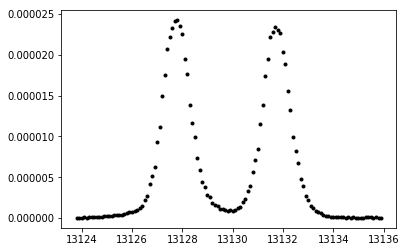

In [179]:
# TODO: plot data as emission signal
y_data=-1*(y_data)
plt.plot(x_data,y_data,'k.')

Text(0.5,1,u'Hydrogen Alpha Absorption Data')

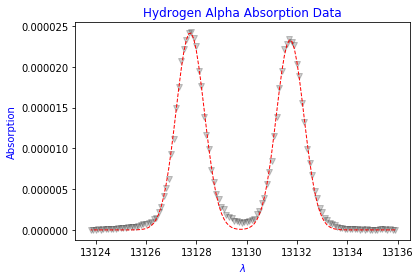

In [186]:
# TODO: fit a function to this data and plot it
def doublegauss(x,amp1,amp2,mean1,mean2,var1,var2):
    return amp1*gaussian(x,mean1,var1)+amp2*gaussian(x,mean2,var2)
params, cov = optimize.curve_fit(doublegauss,x_data,y_data,p0=(.00008,.00008,13127,13132,.1,.1),bounds=((0,0,13124,13124,0,0),(np.inf,np.inf,np.inf,np.inf,np.inf,np.inf)))

plt.plot(x_data,y_data,'kv',alpha=.2)
plt.plot(x_data,doublegauss(x_data,*params),'--',color='red',lw=1)
plt.xlabel('$\lambda$',color='blue')
plt.ylabel('Absorption',color='blue')
plt.title('Hydrogen Alpha Absorption Data',color='blue')

# Part 2

Text(0.5,1,u'Minie')

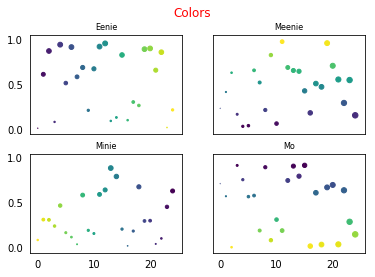

In [234]:
# TODO: part 2
f, axarr = plt.subplots(2,2,sharex=True, sharey=True)
y=np.random.random(100)
x=np.arange(0,25,1)
axarr[0,0].scatter(x,y[0:25],s=25*y[0:25],c=x*30)
axarr[1,0].scatter(x,y[25:50],s=25*y[25:50],c=-30*x)
axarr[0,1].scatter(x,y[50:75],s=inc_sizes,c=30*y[50:75])
axarr[1,1].scatter(x,y[75:100],s=inc_sizes,c=-30*y[75:100])
plt.suptitle('Colors',color='red')
axarr[0][1].tick_params(bottom='off',left='off')
axarr[1][1].tick_params(bottom='off',left='off')
axarr[0][0].tick_params(bottom='off',left='off')
axarr[1][0].tick_params(bottom='off',left='off')
axarr[0][1].set_title('Meenie',fontsize=8)
axarr[1][1].set_title('Mo',fontsize=8)
axarr[0][0].set_title('Eenie',fontsize=8)
axarr[1][0].set_title("Minie",fontsize=8)


# Part 3

In [218]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

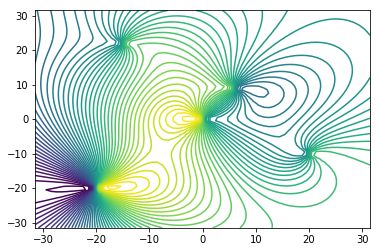

In [233]:
# TODO create arrays of information
x_locs=[-20,6,0,20,-15]
y_locs=[-20,9,0,-10,22]
charge=[8,-3,-4,2,2]
xs=np.linspace(-31.5,31.5,64)
ys=xs
# TODO get flux
flux = flux_for_dipole(x_locs,y_locs,charge,xs,ys)
# TODO plot contours of the flux
plt.contour(xs,ys,flux,60)